<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-06-22 17:59:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.2’

survey-results-publ 100%[===================>] 201.62M  61.8MB/s    in 3.3s    

2025-06-22 17:59:41 (61.8 MB/s) - ‘survey-results-public.sqlite.2’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [7]:
!pip install pandas

In [6]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 138.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 152.6 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [8]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('survey-data.sqlite')

# Query JobSat column sample
query = """
SELECT JobSat
FROM main
LIMIT 20
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(df)


    JobSat
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     8.0
11     NaN
12     8.0
13     NaN
14     NaN
15     5.0
16     NaN
17     NaN
18    10.0
19     NaN


In [11]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('survey-results-public.sqlite')

# Step 1: List all tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
print("Tables available:", tables['name'].tolist())

# Step 2: Check columns of likely tables (replace 'survey_results' with your table name if different)
table_name = tables['name'].iloc[0]  # Take first table as example
columns_query = f"PRAGMA table_info({table_name});"
columns = pd.read_sql_query(columns_query, conn)
print(f"Columns in table '{table_name}':\n", columns[['name', 'type']])

# Step 3: Preview first 10 rows of CompTotal column if it exists
if 'CompTotal' in columns['name'].values:
    data_preview = pd.read_sql_query(f"SELECT CompTotal FROM {table_name} LIMIT 10;", conn)
    print("Sample CompTotal data:\n", data_preview)
    
    # Step 4: Check for nulls and basic statistics
    stats = pd.read_sql_query(f"SELECT COUNT(*) as total_rows, COUNT(CompTotal) as non_null, MIN(CompTotal) as min_val, MAX(CompTotal) as max_val, AVG(CompTotal) as avg_val FROM {table_name};", conn)
    print("CompTotal stats:\n", stats)
else:
    print(f"'CompTotal' column not found in table '{table_name}'")

conn.close()


Tables available: ['main']
Columns in table 'main':
                     name     type
0             ResponseId  INTEGER
1             MainBranch     TEXT
2                    Age     TEXT
3             Employment     TEXT
4             RemoteWork     TEXT
..                   ...      ...
109      JobSatPoints_11     REAL
110         SurveyLength     TEXT
111           SurveyEase     TEXT
112  ConvertedCompYearly     REAL
113               JobSat     REAL

[114 rows x 2 columns]
Sample CompTotal data:
   CompTotal
0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
CompTotal stats:
    total_rows  non_null  min_val        max_val        avg_val
0       65437     33740      0.0  1.000000e+150  2.963841e+145


In [14]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('survey-results-public.sqlite')

# Load distinct raw Age values to inspect the format
query = "SELECT DISTINCT Age FROM main WHERE Age IS NOT NULL LIMIT 100;"
df_age = pd.read_sql_query(query, conn)

conn.close()

# Display the results
print("Unique Age values (sample):")
print(df_age)


Unique Age values (sample):
                  Age
0  Under 18 years old
1     35-44 years old
2     45-54 years old
3     18-24 years old
4     25-34 years old
5     55-64 years old
6   Prefer not to say
7   65 years or older


In [12]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query: Group CompTotal by JobSatPoints_6, showing count and average compensation
query = """
SELECT 
    JobSatPoints_6,
    COUNT(CompTotal) AS NumResponses,
    AVG(CompTotal) AS AvgCompensation,
    MIN(CompTotal) AS MinComp,
    MAX(CompTotal) AS MaxComp
FROM main
WHERE CompTotal IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
  AND CompTotal BETWEEN 100 AND 500000
GROUP BY JobSatPoints_6
ORDER BY JobSatPoints_6
"""

df_grouped = pd.read_sql_query(query, conn)
conn.close()

# Display the grouped result
print(df_grouped)



    JobSatPoints_6  NumResponses  AvgCompensation  MinComp   MaxComp
0              0.0          4229    115272.799243    100.0  500000.0
1              1.0            24    124854.166667   7500.0  400000.0
2              2.0            26    147583.346154    120.0  400000.0
3              3.0            17    121926.470588    666.0  500000.0
4              4.0            11    118490.909091    200.0  420000.0
..             ...           ...              ...      ...       ...
81            96.0             1     37056.000000  37056.0   37056.0
82            97.0             1     56000.000000  56000.0   56000.0
83            98.0             1     16000.000000  16000.0   16000.0
84            99.0             6    100800.000000    800.0  360000.0
85           100.0           514    103342.745136    250.0  500000.0

[86 rows x 5 columns]


In [13]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Load the CompTotal column
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL LIMIT 100;"
df_comptotal = pd.read_sql_query(query, conn)
conn.close()

# Show the result
print("Sample of CompTotal values:")
print(df_comptotal.head(20))  # Adjust the number if needed


Sample of CompTotal values:
    CompTotal
0   2040000.0
1     28000.0
2     85000.0
3     50000.0
4    110000.0
5    126420.0
6     95000.0
7    195000.0
8     35000.0
9     54000.0
10   145000.0
11    74000.0
12   170000.0
13    27000.0
14    62000.0
15    80000.0
16    98000.0
17    50000.0
18   230000.0
19    85000.0


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


<Figure size 1200x600 with 0 Axes>

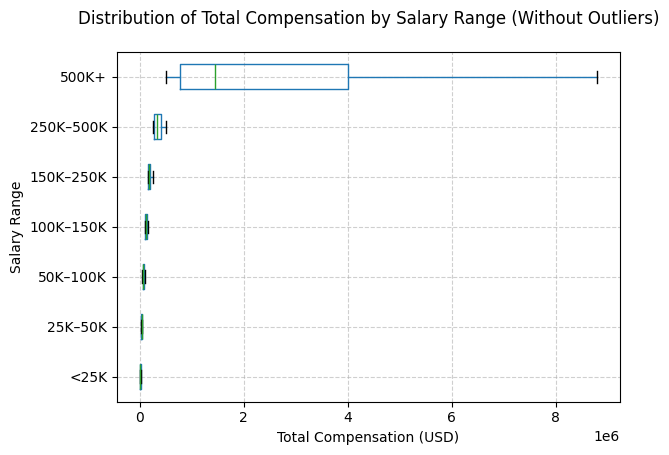

In [28]:
# ===========================================
# EDITED CompTotal Box Plot (Improved Version)
# ===========================================

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the compensation column
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)
conn.close()

# Step 3: Clean the data
df = df.dropna(subset=['CompTotal'])
df = df[df['CompTotal'] > 0]

# Step 4: Define salary bins and labels
bins = [0, 25000, 50000, 100000, 150000, 250000, 500000, float('inf')]
labels = ['<25K', '25K–50K', '50K–100K', '100K–150K', '150K–250K', '250K–500K', '500K+']
df['SalaryRange'] = pd.cut(df['CompTotal'], bins=bins, labels=labels, right=False)

# Step 5: Create the improved box plot
plt.figure(figsize=(12, 6))
df.boxplot(column='CompTotal', by='SalaryRange', showfliers=False, vert=False)  # Key change: removed outliers

# Step 6: Customize plot appearance
plt.title('Distribution of Total Compensation by Salary Range (Without Outliers)', pad=20)
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Salary Range')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

            CompTotal
count    29733.000000
mean    163239.127199
std     193325.591397
min        100.000000
25%      55000.000000
50%      96000.000000
75%     177900.000000
max    1000000.000000


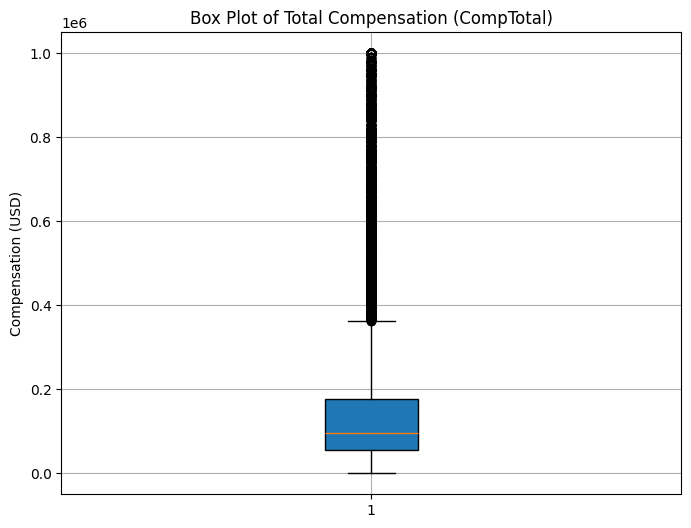

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-results-public.sqlite')

# Load and clean CompTotal data
query = """
SELECT CompTotal 
FROM main
WHERE CompTotal IS NOT NULL
AND CompTotal BETWEEN 100 AND 1000000
"""

df = pd.read_sql_query(query, conn)

conn.close()

# Check cleaned data stats
print(df.describe())

# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['CompTotal'], vert=True, patch_artist=True)
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Compensation (USD)')
plt.grid(True)
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


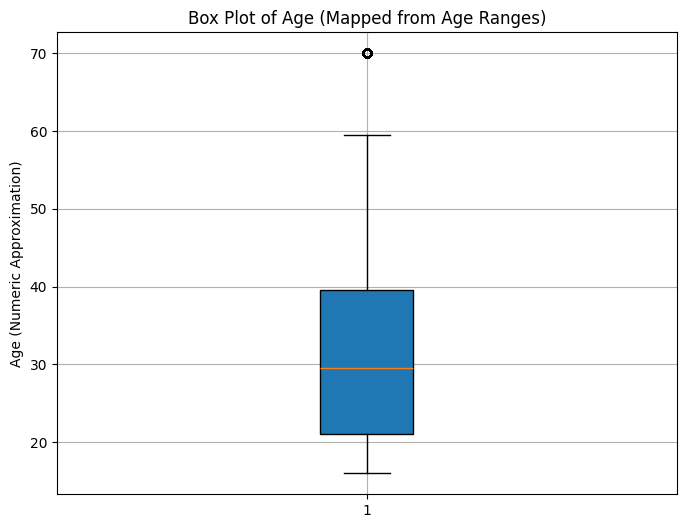

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('survey-results-public.sqlite')

# Load the Age column
df = pd.read_sql_query("SELECT Age FROM main", conn)
conn.close()

# Define mapping from age category to numeric midpoint
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
    # 'Prefer not to say' is not included, so it will become NaN
}

# Apply the mapping
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows with NaN AgeNumeric
df_clean = df.dropna(subset=['AgeNumeric'])

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['AgeNumeric'], vert=True, patch_artist=True)
plt.title('Box Plot of Age (Mapped from Age Ranges)')
plt.ylabel('Age (Numeric Approximation)')
plt.grid(True)
plt.show()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [3]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 167.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 148.8 MB/s eta 0:00:00


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_301/1636257609.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='AgeGroup', y='CompTotal', palette='Set2')


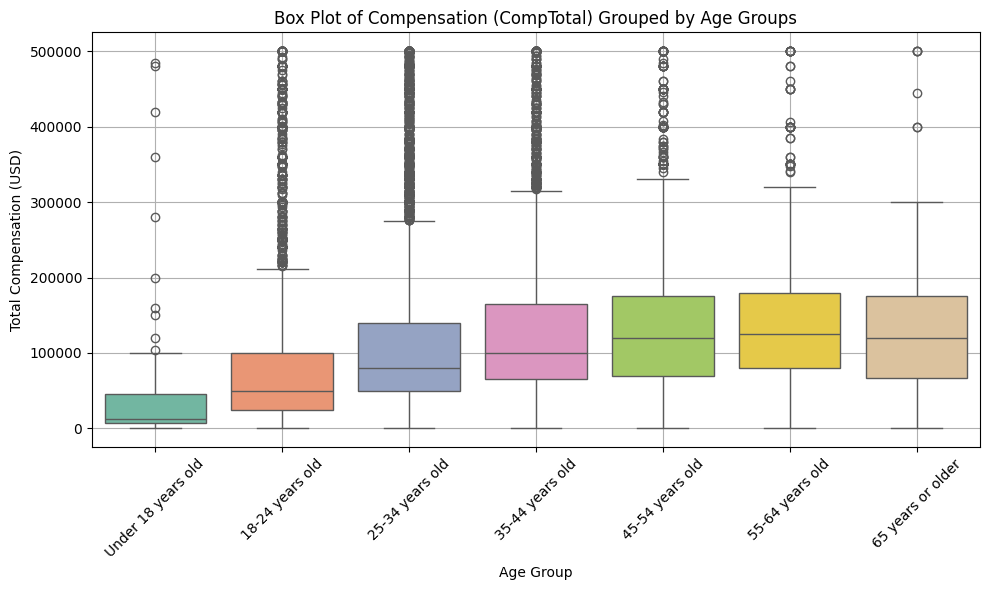

In [10]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to database and load Age & CompTotal columns
conn = sqlite3.connect('survey-results-public.sqlite')
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Define age group mapping
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df = df[df['Age'].isin(age_order)]  # Drop "Prefer not to say" and nulls
df['AgeGroup'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Step 3: Clean CompTotal
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df_clean = df.dropna(subset=['CompTotal', 'AgeGroup'])
df_clean = df_clean[(df_clean['CompTotal'] >= 100) & (df_clean['CompTotal'] <= 500000)]

# Step 4: Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='AgeGroup', y='CompTotal', palette='Set2')

# Labels and titles
plt.title('Box Plot of Compensation (CompTotal) Grouped by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_301/1754831892.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='JobSatPoints_6', y='CompTotal', palette='viridis')


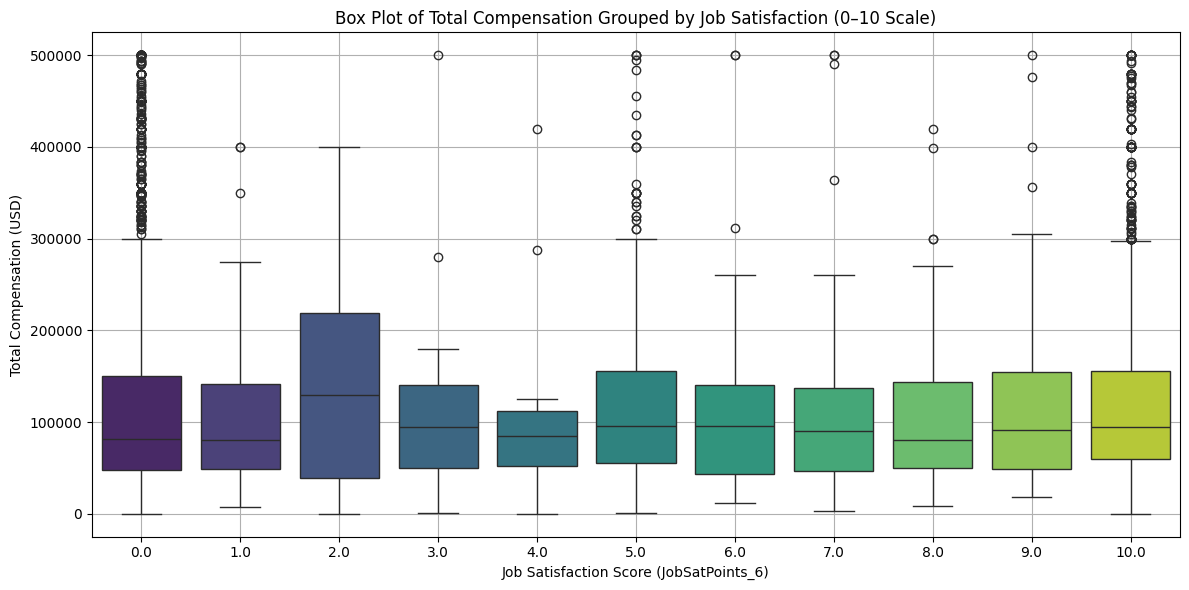

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load necessary columns
conn = sqlite3.connect('survey-results-public.sqlite')
query = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Convert to numeric and clean data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Step 3: Filter to valid ranges
df_clean = df[
    (df['CompTotal'] >= 100) &
    (df['CompTotal'] <= 500000) &
    (df['JobSatPoints_6'] >= 0) &
    (df['JobSatPoints_6'] <= 10)
]

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='JobSatPoints_6', y='CompTotal', palette='viridis')

# Labels and layout
plt.title('Box Plot of Total Compensation Grouped by Job Satisfaction (0–10 Scale)')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Total Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_301/659815450.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_roles, x='DevType', y='ConvertedCompYearly', palette='Set3')


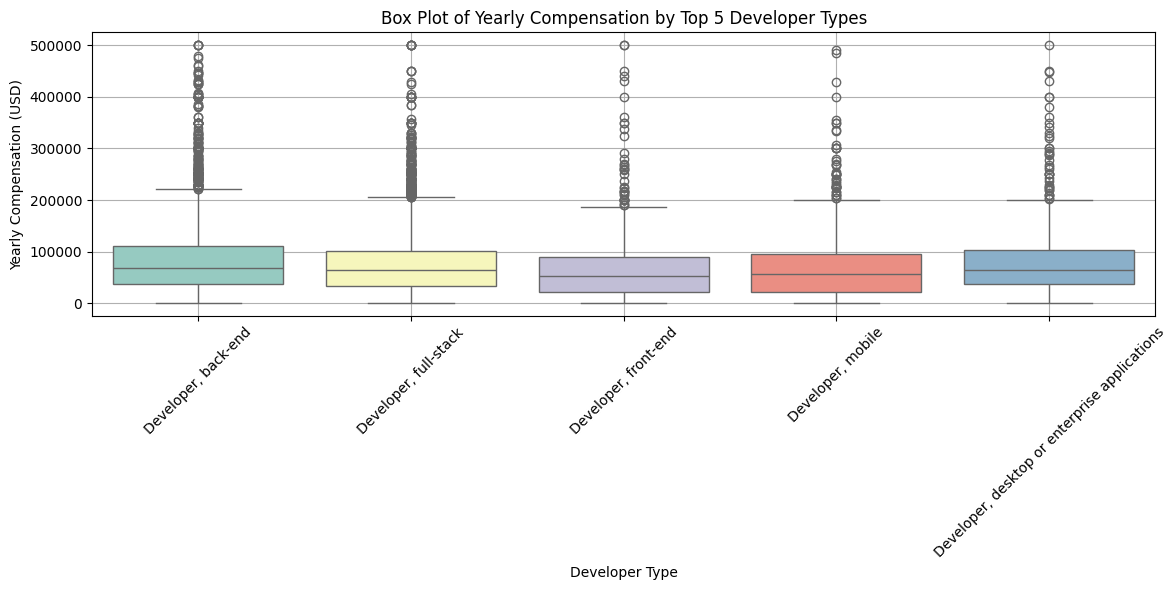

In [15]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect and load necessary columns
conn = sqlite3.connect('survey-results-public.sqlite')
query = """
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 2: Convert compensation to numeric and drop nulls
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])

# Step 3: Explode multiple DevTypes into separate rows
df['DevType'] = df['DevType'].str.split(';')
df_exploded = df.explode('DevType')
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# Step 4: Get Top 5 Developer Roles
top_5_roles = df_exploded['DevType'].value_counts().nlargest(5).index.tolist()
df_top_roles = df_exploded[df_exploded['DevType'].isin(top_5_roles)]

# Step 5: Filter compensation to a reasonable range (optional)
df_top_roles = df_top_roles[(df_top_roles['ConvertedCompYearly'] >= 1000) & 
                            (df_top_roles['ConvertedCompYearly'] <= 500000)]

# Step 6: Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_roles, x='DevType', y='ConvertedCompYearly', palette='Set3')

# Formatting
plt.title('Box Plot of Yearly Compensation by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_301/4191534475.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='Country', y='CompTotal', palette='Set2')


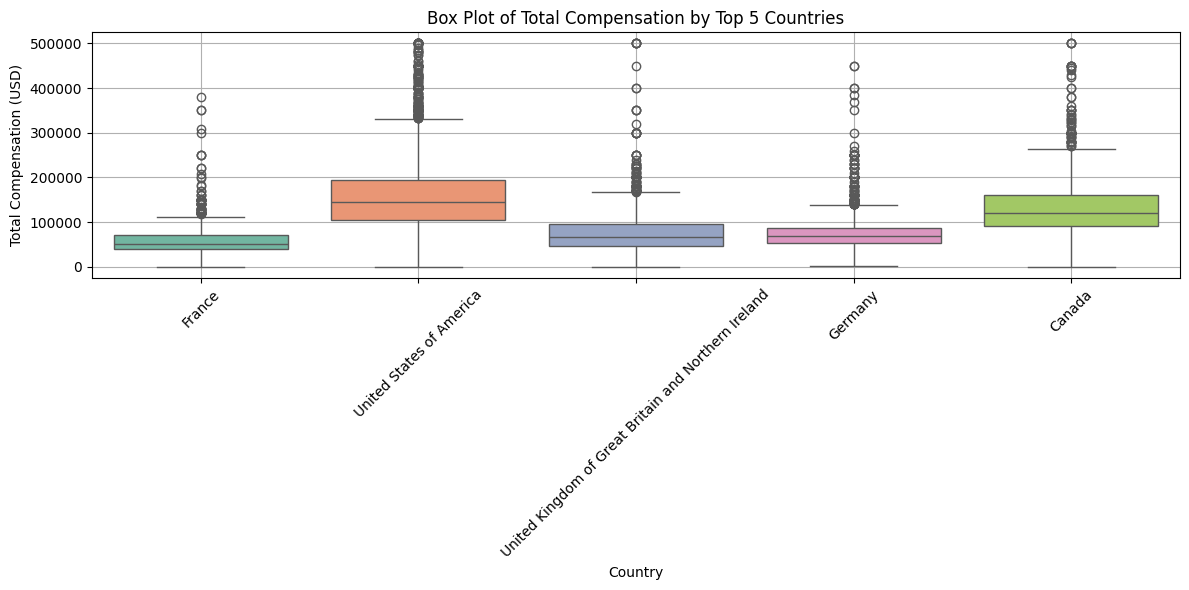

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect and load data
conn = sqlite3.connect('survey-results-public.sqlite')
query = """
SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convert CompTotal to numeric and clean
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Country'])
df = df[(df['CompTotal'] >= 100) & (df['CompTotal'] <= 500000)]

# Find top 5 countries by respondent count
top_countries = df['Country'].value_counts().nlargest(5).index.tolist()
df_top5 = df[df['Country'].isin(top_countries)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top5, x='Country', y='CompTotal', palette='Set2')

# Labels and formatting
plt.title('Box Plot of Total Compensation by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_301/637537337.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Employment', y='CompTotal', palette='pastel')
/tmp/ipykernel_301/637537337.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


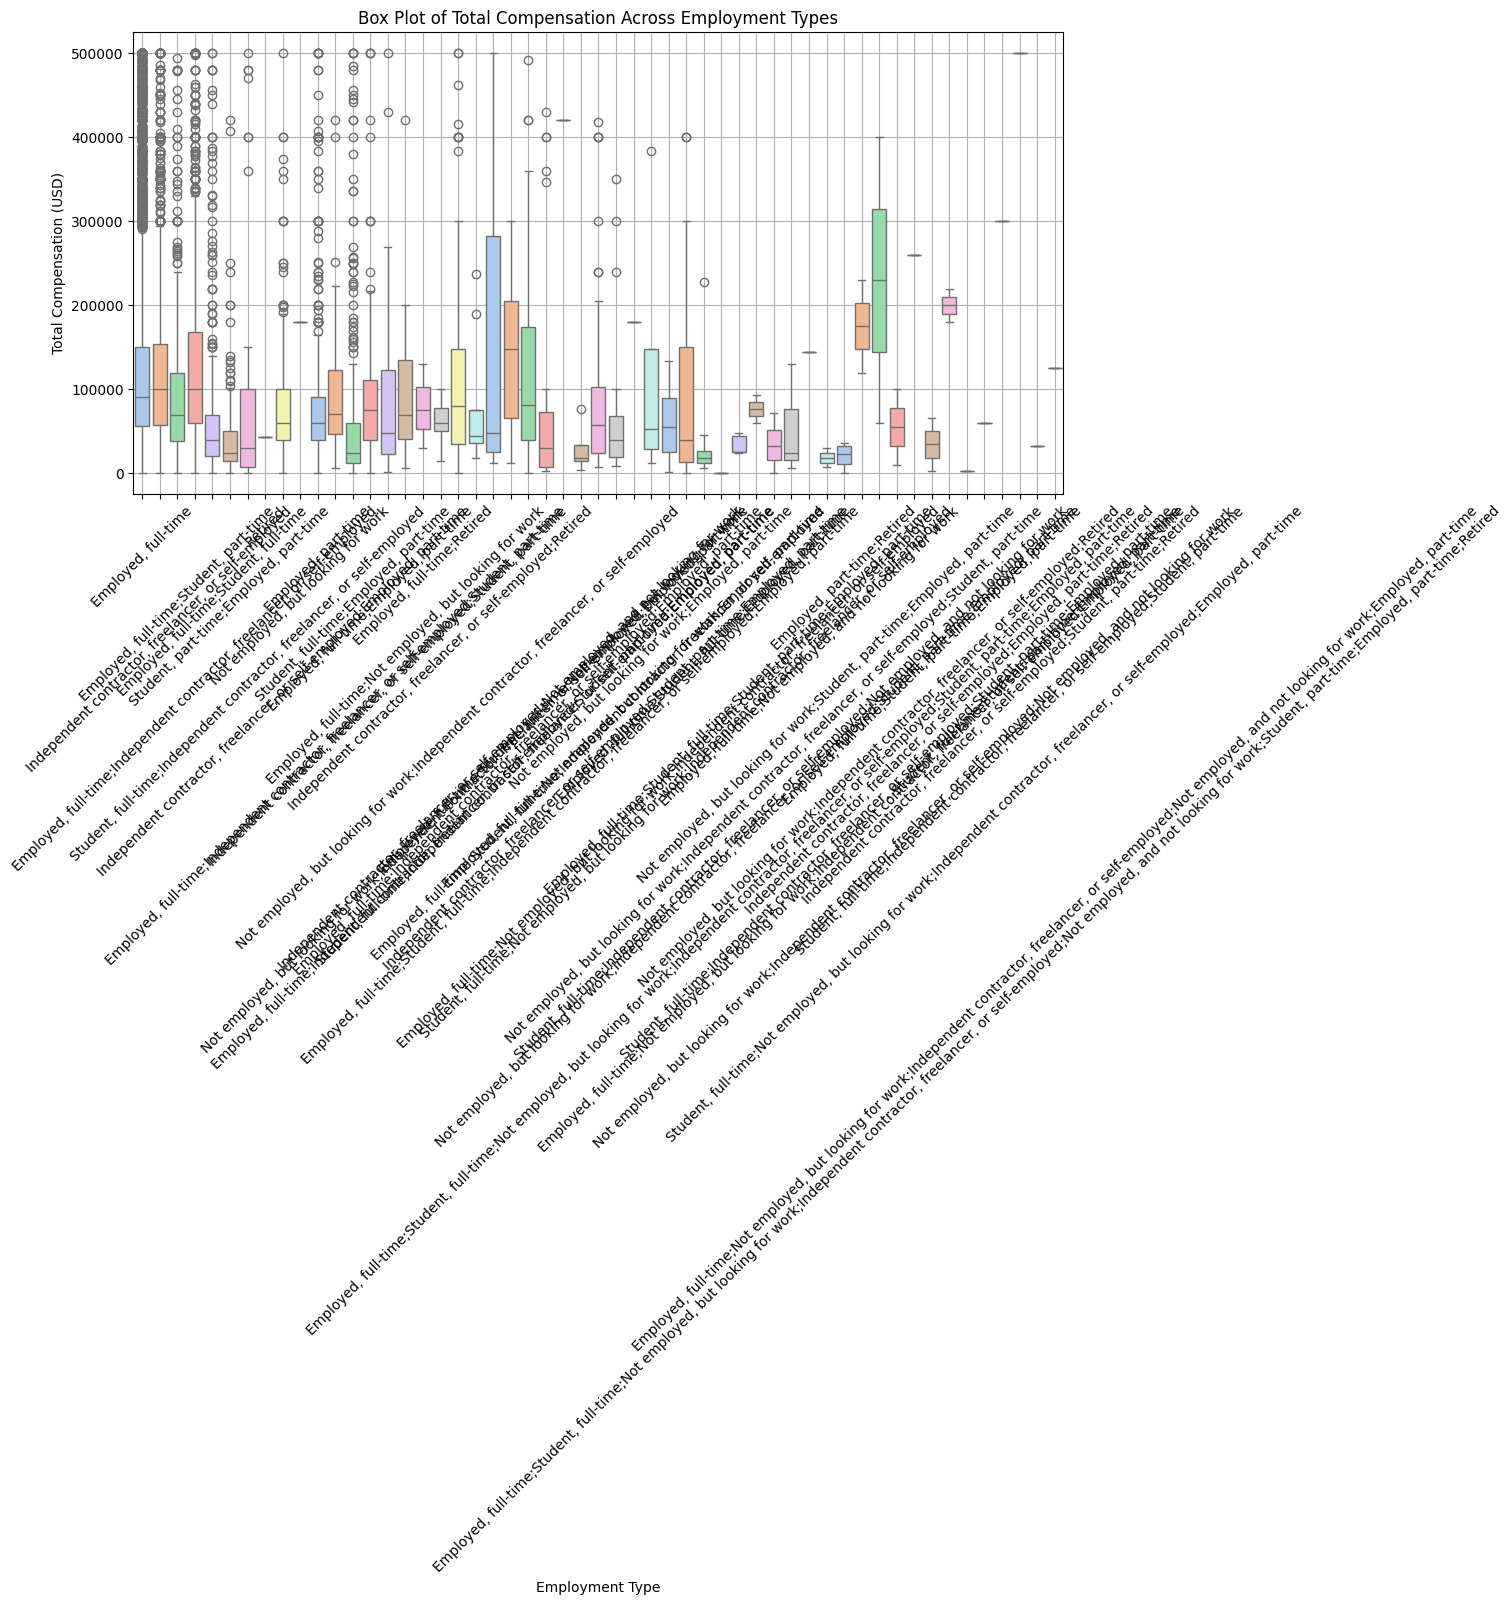

In [17]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Query to get Employment and CompTotal
query = """
SELECT Employment, CompTotal
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convert CompTotal to numeric and clean data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal', 'Employment'])

# Filter reasonable compensation values
df = df[(df['CompTotal'] >= 100) & (df['CompTotal'] <= 500000)]

# Optional: filter or clean Employment strings if necessary (e.g., remove empty or unknown categories)
df = df[df['Employment'].str.strip() != '']

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Employment', y='CompTotal', palette='pastel')

# Formatting
plt.title('Box Plot of Total Compensation Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_301/2767494735.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='JobSatPoints_6', y='YearsCodePro', palette='coolwarm')


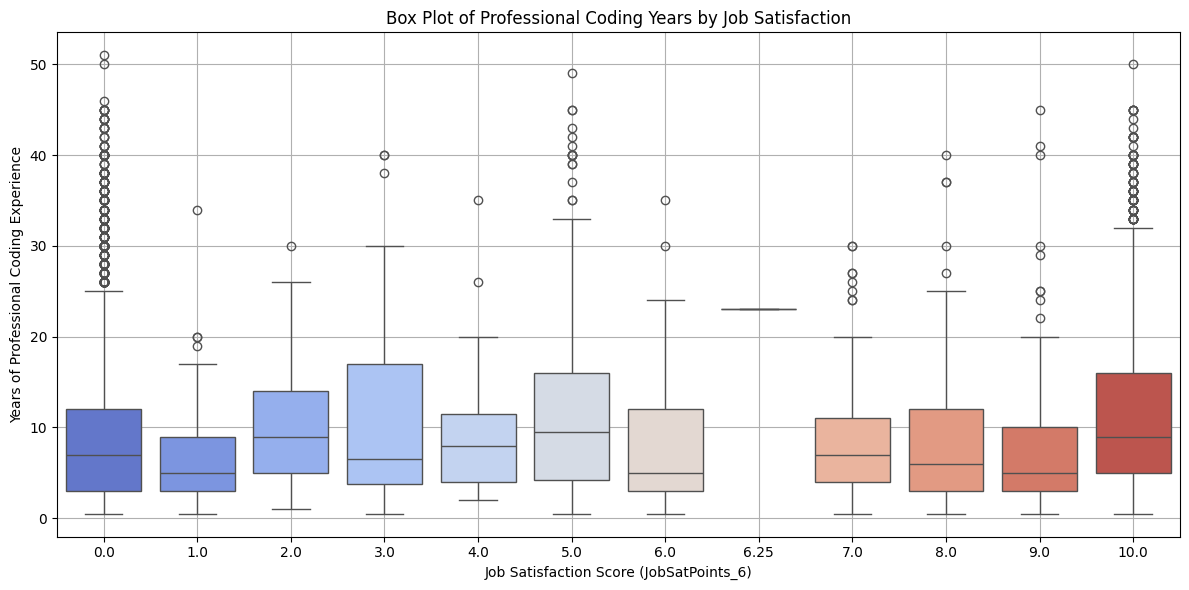

In [18]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect and load data
conn = sqlite3.connect('survey-results-public.sqlite')
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convert YearsCodePro to numeric - handle special cases if any (e.g., "Less than 1 year", "More than 50 years")
def convert_years_code(value):
    if value is None:
        return None
    value = str(value).strip()
    if value.lower() == "less than 1 year":
        return 0.5
    elif value.lower() == "more than 50 years":
        return 51
    else:
        try:
            return float(value)
        except:
            return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing or invalid values
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Optional: Filter job satisfaction scores in expected range (0-10)
df_clean = df_clean[(df_clean['JobSatPoints_6'] >= 0) & (df_clean['JobSatPoints_6'] <= 10)]

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='JobSatPoints_6', y='YearsCodePro', palette='coolwarm')

plt.title('Box Plot of Professional Coding Years by Job Satisfaction')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [19]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
